<a href="https://colab.research.google.com/github/Rusulabbas/219-FINAL/blob/main/Classification_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from itertools import combinations
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_predict
from scipy.stats import chi2_contingency

#Chi-Squared Test

Here we conducted a chi-square test between our categorical variables and our predictor on NObeyesdad. If our p-value is below our alpha of 0.05, it is a good category to use for our test

WHY??? We had problems using quantitative columns so we decided it was best to use only categorical columns


In [ ]:
#Uploading data and droping the Age column
url = 'https://raw.githubusercontent.com/Rusulabbas/219-FINAL/main/ObesityDataSet.csv'
df = pd.read_csv(url)
df = df.dropna()
df = df.drop(['Age'], axis=1)
df.head(15)

In [5]:


#Prefome chi-square test
# Create a crosstab between all the different variables that are categorical
cross_tab = pd.crosstab(df['MTRANS'], df['NObeyesdad'])
cross_tab
#run the Chi-square test, p value, and dagrees of freedom
chi2, p, dof, expected = chi2_contingency(cross_tab)
p

5.177915203835779e-48

We ran the test on EVERY categorical Valies and here were the results. The code above is to show the process.

P - values of every variable from least to greatest

1. Gender: 8.088897293329991e-139

2. family_history_with_overweight: 4.2280167944705074e-131

3. CAEC: 7.383852893286775e-159

4. FAVC: 1.4822362082358762e-47

5. MTRANS: 5.177915203835779e-48

6. SCC: 3.773175792377203e-24

7. SMOKE: 1.5354243135096318e-05

8. CALC: 5.287157877798017e-61

In [ ]:
#data types of each column
print(df.dtypes)

In [ ]:
#Storing the catagorical variables in a datafame
features_cat = df[['Gender', 'family_history_with_overweight', 'FAVC','CAEC','SMOKE','SCC', 'MTRANS','CALC']]
features_cat

In [ ]:
#Getting combinations of 4 features from 'features_cat' and storing them in 'listOfFeaturecombos'
listOfFeaturecombos = []
for features in combinations(features_cat, 4):
  print(features)
  list(features)

In [ ]:
#LOGISTIC REGRESSION
#Defining a pipeline for logistic regression
pipeline_rg = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    LogisticRegression(random_state=0)
)
#Creating a dictionary to store f1 scores for different feature combinations
f1_logistic= {}

#Creating a for loop to iterate over different sizes of feature combinations
#from 1 to 7. We picked the range from 1 to 7 because we have 7 categorical
#variables, resulting in numerous possible combinations. By iterating over this
#range, we ensure that we can explore all possible combinations of features.

for size in range(1,8):
    for features in combinations(features_cat, size):
      #Preforming cross valifationa fn calcualting f1 scores
        scores = cross_val_score(
            pipeline_rg, #logistic regression pipleine
            X=df[list(features)], #features sselected
            y=df['NObeyesdad'], #target
            scoring='f1_macro', #scoring matric, were doing f1 because we are predicting a catagorical variable and it is best for its senestivty with false postives and false negativees
            cv=5 #number of folds
        )

        f1_logistic[str(list(features))] = scores.mean() #stores the mean f1 in the difctionary as a string

f1_logistic

In [ ]:
#sorting the F1 scores in decending order and storing it in a series
f1_logistic_sorted = pd.Series(f1_logistic).sort_values(ascending=False)
f1_logistic_sorted

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'MTRANS', 'CALC']      0.497277
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'MTRANS', 'CALC']    0.477130
['Gender', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'MTRANS', 'CALC']                               0.476902
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'CALC']                0.475879
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC']       0.475430
                                                                                             ...   
['FAVC', 'SMOKE']                                                                          0.094444
['SMOKE', 'SCC']                                                                           0.082850
['FAVC']                                                                                   0.082441
['SCC']                                                                                    0.063095


In [ ]:
#Getting th4e max F1 score from the sorted scores
bestf1_logistic = [f1_logistic_sorted.max()]
bestf1_logistic

[0.49727680775260286]

From the logistic regression model, our highest F1 score is 0.49, which isn't ideal because we aim for our F1 score to be as close to 1 as possible. We will perform two additional tests to identify which ones give us our highest F1 score. Also, the combination of features ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'MTRANS', 'CALC'] has the highest F1 score of approximately 0.497277 in the logistic regression model.

In [ ]:
#Defining a pipeline for K Neareast KNN Classifier
pipeline_kn = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    KNeighborsClassifier(n_neighbors = 5)
)

#Creating a dictionary to store F1 scores
f1_class = {}

#Iterate over the feature combintions from 1 to 7
for size in range(1,8):
    for features in combinations(features_cat, size):
      #preformiong a cross valadation and calcuatling F1 scores
        scores = cross_val_score(
            pipeline_kn, #KNN pipeline
            X=df[list(features)], #Features
            y=df['NObeyesdad'], #Target
            scoring='f1_macro', #scoring
            cv=5 # number of folds
        )
        #storing the mean score for feature combination as a string
        f1_class[str(list(features))] = scores.mean()

f1_class

In [ ]:
#sorting the F1 scores in decending order and storing it in a series

f1_class_sorted = pd.Series(f1_class).sort_values(ascending=False)
f1_class_sorted

['Gender', 'family_history_with_overweight', 'CAEC', 'SMOKE', 'SCC', 'MTRANS', 'CALC']     0.227470
['Gender', 'family_history_with_overweight', 'CAEC', 'SMOKE', 'MTRANS', 'CALC']            0.212506
['Gender', 'family_history_with_overweight', 'CAEC', 'SCC', 'MTRANS', 'CALC']              0.208651
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'MTRANS', 'CALC']      0.202239
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'MTRANS', 'CALC']    0.198177
                                                                                             ...   
['family_history_with_overweight', 'FAVC', 'MTRANS']                                       0.032964
['Gender', 'family_history_with_overweight', 'MTRANS']                                     0.032614
['CAEC', 'SMOKE', 'SCC', 'MTRANS']                                                         0.031534
['CAEC', 'SMOKE', 'SCC']                                                                   0.030689


In [ ]:
#Getting the max F1 score from the sorted F1 scores from the KNN model
bestf1_class = [f1_class_sorted.max()]
bestf1_class

[0.227469554051408]


The combination of features ['Gender', 'family_history_with_overweight', 'CAEC', 'SMOKE', 'SCC', 'MTRANS', 'CALC'] achieved the highest F1 score of approximately 0.227470 in the k-Nearest Neighbors (KNN) model. However, it is notably lower compared to the logistic regression model's performance

In [ ]:
#DECISIONTREE
#Creating a pipeline for Decision Tree Classifier
pipeline_dt = make_pipeline(
    OneHotEncoder(handle_unknown='ignore'),
    DecisionTreeClassifier(random_state=0)
)

#Creating a dictionary to store the F1 scores for the features
f1_DT = {}

#Iterate over the feature combintions from 1 to 7
for size in range(1,8):
    for features in combinations(features_cat, size):
      ##preformiong a cross valadation and calcuatling F1 scores
        scores = cross_val_score(
            pipeline_dt, #Decision Tree pipeline
            X=df[list(features)],  #Features
            y=df['NObeyesdad'], #Target
            scoring='f1_macro', #Scoring
            cv=5 #number of folds
        )
        #storing the mean score for feature combination as a string
        f1_DT[str(list(features))] = scores.mean()

f1_DT

In [ ]:
#sorting the F1 scores in desending order and storing them as a series
f1_DT_sorted = pd.Series(f1_DT).sort_values(ascending=False)
f1_DT_sorted

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'MTRANS', 'CALC']      0.578565
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'MTRANS', 'CALC']    0.562317
['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'MTRANS', 'CALC']             0.557977
['Gender', 'family_history_with_overweight', 'CAEC', 'SMOKE', 'SCC', 'MTRANS', 'CALC']     0.537799
['Gender', 'family_history_with_overweight', 'CAEC', 'SCC', 'MTRANS', 'CALC']              0.537437
                                                                                             ...   
['FAVC', 'SMOKE']                                                                          0.094444
['FAVC']                                                                                   0.085347
['SMOKE', 'SCC']                                                                           0.082850
['SCC']                                                                                    0.063095


In [ ]:
#Getting the max F1 score from the sorted F1 scores from the Decision Tree model
bestf1_dt = [f1_DT_sorted.max()]
bestf1_dt

[0.5785654912513433]


The combination of features ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SCC', 'MTRANS', 'CALC'] has the highest F1 score of approximately 0.578565 in the Decision Tree model. Which is greater than the other models we have.

Below we are creating a confusion matrixcs for our Decision Tree Model

In [ ]:
#creating a label for the confsuion matrix
labels = ["Normal_Weight", "Overweight_Level_I", "Overweight_Level_II", "Obesity_Type_I", "Insufficient_Weight", "Obesity_Type_II", "Obesity_Type_III"]

In [ ]:

X = df[['Gender', 'family_history_with_overweight', 'FAVC','CAEC','SMOKE','SCC', 'MTRANS','CALC']] #features
y = df['NObeyesdad'] #Target
pipeline_dt #Decsion Tree pipline defined above
#getting prediction using cross val
y_pred = cross_val_predict( pipeline_dt , X , y, cv = 4 ) #
y_pred


array(['Overweight_Level_II', 'Normal_Weight', 'Overweight_Level_II', ...,
       'Obesity_Type_III', 'Obesity_Type_III', 'Obesity_Type_III'],
      dtype=object)

In [ ]:
# gettting the confusion matrix using the actual target variable (y) and the predicted values (y_pred)

conf_matrix = confusion_matrix(y, y_pred)
conf_matrix

array([[206,  26,   5,  31,   1,   2,   1],
       [ 57, 129,  24,  18,  10,  21,  28],
       [  8,  16, 188,  87,  31,   4,  17],
       [ 15,   7,  55, 218,   1,   1,   0],
       [  0,   2,   0,   0, 321,   0,   1],
       [ 12,  35,  53,  72,  26,  87,   5],
       [ 30,  29,  28,  94,   5,  10,  94]])

In [ ]:
#creating a datafrom from the confusion matrix
df_conf_matrix = pd.DataFrame(
    conf_matrix, #confsuion matrix
    index=labels, # row labels - true class labels
    columns=labels #column lables - prediction class labels
)

print(df_conf_matrix)

                     Normal_Weight  Overweight_Level_I  Overweight_Level_II  \
Normal_Weight                  206                  26                    5   
Overweight_Level_I              57                 129                   24   
Overweight_Level_II              8                  16                  188   
Obesity_Type_I                  15                   7                   55   
Insufficient_Weight              0                   2                    0   
Obesity_Type_II                 12                  35                   53   
Obesity_Type_III                30                  29                   28   

                     Obesity_Type_I  Insufficient_Weight  Obesity_Type_II  \
Normal_Weight                    31                    1                2   
Overweight_Level_I               18                   10               21   
Overweight_Level_II              87                   31                4   
Obesity_Type_I                  218                    1   

Below is the confusion matrix displayed above. However, due to the lengthy labels, Colab ran out of space to display the matrix in a user-friendly manner. So, we have recreated the matrix below for better visibility.

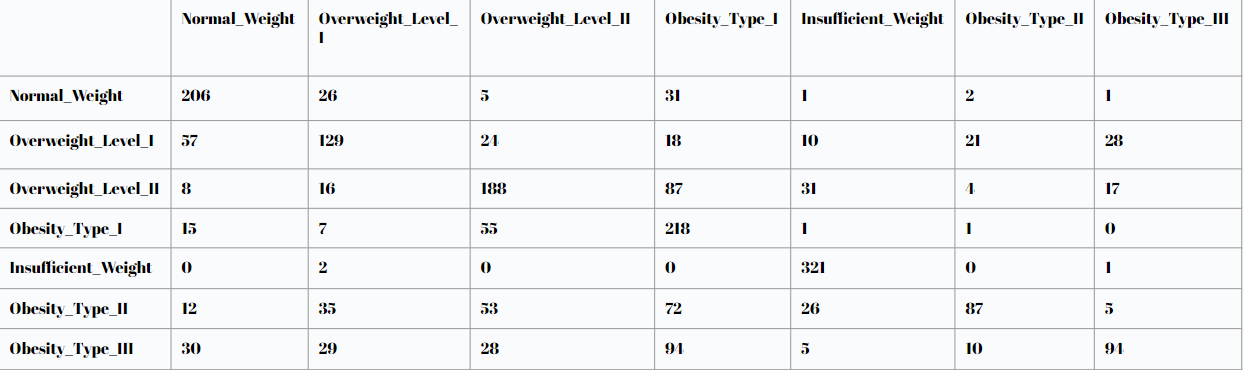

Each row of the matrix corresponds to the true classifications, while each column represents the model's predictions. "Insufficient Weight" is the top performer, with the model correctly identifying 321 people, demonstrating a strong match between the model's predictions and the actual class. However, the model didnt do so welll with "Obesity Type III," frequently misidentifying these people. This implies that the features used by the model might not have the specifications required to identify "Obesity Type III" from other similar categories.